In [1]:
import pandas as pd
import numpy as np

import flosp

In [2]:
sd = flosp.Interface("./setup.py")

flosp started.
<module 'flosp.expected_structures.ED' from 'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH030_HHFT_flow\\4_Analysis\\flosp\\flosp\\expected_structures\\ED.py'>
<module 'flosp.expected_structures.IP' from 'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH030_HHFT_flow\\4_Analysis\\flosp\\flosp\\expected_structures\\IP.py'>
Imported setup.py sucessfully.
Loading processed data from pickles.
Found: ./simpleday/example_results/processed/ED.pkl
Missing: ./simpleday/example_results/processed/IPfce.pkl
Missing: ./simpleday/example_results/processed/IPward.pkl
Missing: ./simpleday/example_results/processed/IPspell.pkl
Missing: ./simpleday/example_results/processed/HOURLY.pkl
Missing: ./simpleday/example_results/processed/DAILY.pkl


In [3]:
sd.metadata.HOSPITAL_NAME

'simpleday'

In [4]:
sd.metadata.RESULTS_SAVE_PATH

'./simpleday/example_results/'

In [5]:
sd.load_dataED("./SimpleED.csv")

IO class called.
ARRIVAL_DTTM
TRIAGE_ASSESSMENT_DTTM
FIRSTDOC_FOR_TREATMENT_DTTM
ADM_REQUEST_DTTM
DEPARTURE_DTTM
----------------------------------------
Making callender columns from:  ARRIVAL_DTTM
----------------------------------------
Making callender columns from:  DEPARTURE_DTTM
----------------------------------------
saved file: ./simpleday/example_results/processed/ED.pkl
Import completed.


In [6]:
sd.load_dataIP("./SimpleIP.csv")

IO class called.
ADM_DTTM
DIS_DTTM
LOCATION_START
LOCATION_END
----------------------------------------
Making callender columns from:  ADM_DTTM
----------------------------------------
Making callender columns from:  DIS_DTTM
----------------------------------------
saved file: ./simpleday/example_results/processed/IP.pkl
Import completed.


In [7]:
sd.make_new_tables()

C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp\flosp\aggregation.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['event_column_name_rounded'] = df[event_column_name].apply(lambda x : x.replace(second=0, minute=0)) # round to lower hour


----------------------------------------
Making callender columns from:  date


# Plotting trials

In [8]:
import matplotlib.pyplot as plt

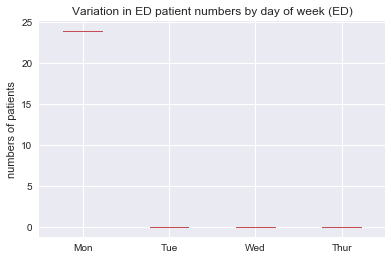

In [9]:
s = pd.datetime(2018,1,1)
e = pd.datetime(2018,2,1)
sd.plot_period(s,e,15)

2018-01-01 00:00:00


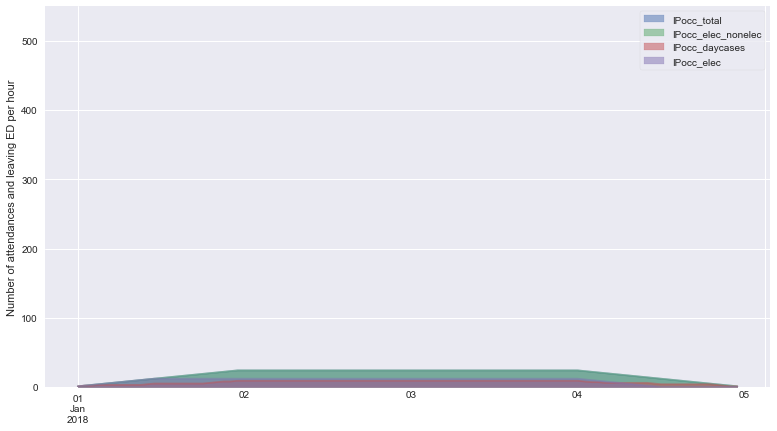

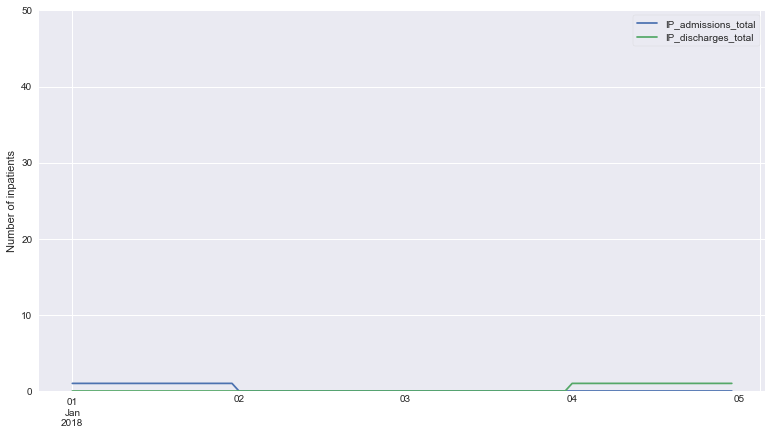

In [11]:
s = pd.datetime(2018,1,1)
e = pd.datetime(2018,2,1)
sd.plot_week(s,24)

In [32]:
def occupancy_plotting(df,start = [2018,1,1],days=7,addname=''):
    """
    plot to automate occupancy and adm/dis curves.
    """
    size = (13,7)
    #### get start and end times as datetimes
    s = pd.datetime(start[0],start[1],start[2])
    print(s)
    e = s + pd.Timedelta(days,unit='d')
    
    #### check and warn if start time is not a monday
    if s.weekday() != 0:
        print('Warning: date does not start on a Monday, day:' + str(s.weekday()))
        #warnings.warn('The date does not start on a monday.')
    
    #### ED occ plot
    EDocccols = ['EDocc_total','EDocc_breaching_patients','EDocc_awaiting_adm']
    name  = '-'.join([str(x) for x in start]) + '_ED_occ' +  addname
    fig, ax = plt.subplots()
    df[s:e][EDocccols].plot.area(stacked=False,figsize=size,ax=ax)
    ax.set_ylim(0,50)
    ax.set_ylabel('Number of patients in ED')
    ax.legend(frameon=True)
#     fig.savefig('./../hhft/visualisataions_for_hhft_slides(IP)/plots/' + name + '.png', dpi=300)
    
    
    #### ED adm/dis plot
    EDflowcols = ['ED_arrivals','ED_departures']
    name  = '-'.join([str(x) for x in start]) + '_ED_flow' +  addname
    fig, ax = plt.subplots()
    df[s:e][EDflowcols].rolling(3).mean().plot(figsize=size,ax=ax)
    ax.set_ylim(0,25)
    ax.set_ylabel('Number of attendances and leaving ED per hour')
    ax.legend(frameon=True)
#     fig.savefig('./../hhft/visualisataions_for_hhft_slides(IP)/plots/' + name + '.png', dpi=300)
    
    #### IP occ plot
    IPocccols = ['IPocc_total','IPocc_elec_nonelec','IPocc_daycases','IPocc_elec']
    name  = '-'.join([str(x) for x in start]) + '_IP_occ' +  addname
    fig, ax = plt.subplots()
    df[s:e][IPocccols].plot.area(stacked=False,figsize=size,ax=ax)
    ax.set_ylim(0,550)
    ax.set_ylabel('Number of attendances and leaving ED per hour')
    ax.legend(frameon=True)
#     fig.savefig('./../hhft/visualisataions_for_hhft_slides(IP)/plots/' + name + '.png', dpi=300)
    
    #### IP adm/dis plot
    IPcols = ['IP_admissions_total','IP_discharges_total']
    name  = '-'.join([str(x) for x in start]) + '_IP_flow' +  addname
    fig, ax = plt.subplots()
    df[s:e][IPcols].rolling(1).mean().plot(figsize=size,ax=ax);
    ax.set_ylim(0,50)
    ax.set_ylabel('Number of inpatients')
    ax.legend(frameon=True)
#     fig.savefig('./../hhft/visualisataions_for_hhft_slides(IP)/plots/' + name + '.png', dpi=300)
    
#     plt.close("all")
    return

#occupancy_plotting(occ)

In [33]:
hourly = sd.data.HOURLY

In [34]:
hourly.columns

Index(['ED_arrivals', 'ED_departures', 'IP_admissions_total',
       'IP_admissions_excludingdaycases', 'IP_admissions_elec',
       'IP_admissions_elec_nonelec', 'IP_admissions_nonelec',
       'IP_discharges_total', 'IP_discharges_nonelec', 'IP_discharges_elec',
       'IP_discharges_elec_nonelec', 'EDocc_total', 'EDocc_breaching_patients',
       'EDocc_awaiting_adm', 'IPocc_total', 'IPocc_elec', 'IPocc_elec_nonelec',
       'IPocc_excludingdaycases', 'IPocc_daycases',
       'IPadm_minus_dis_elec_nonelec'],
      dtype='object')

2018-01-01 00:00:00


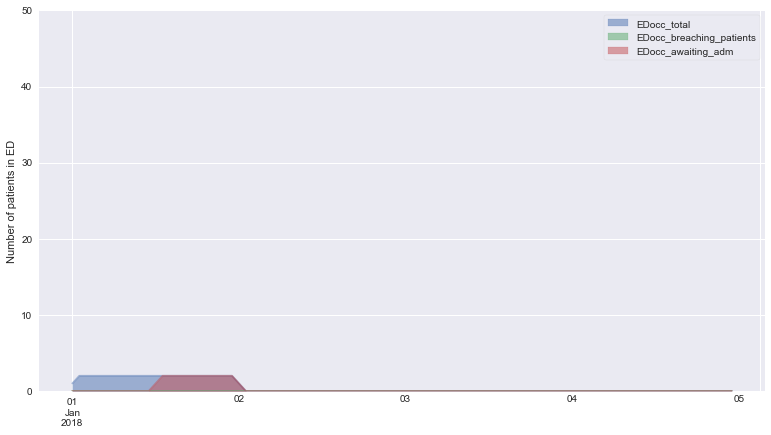

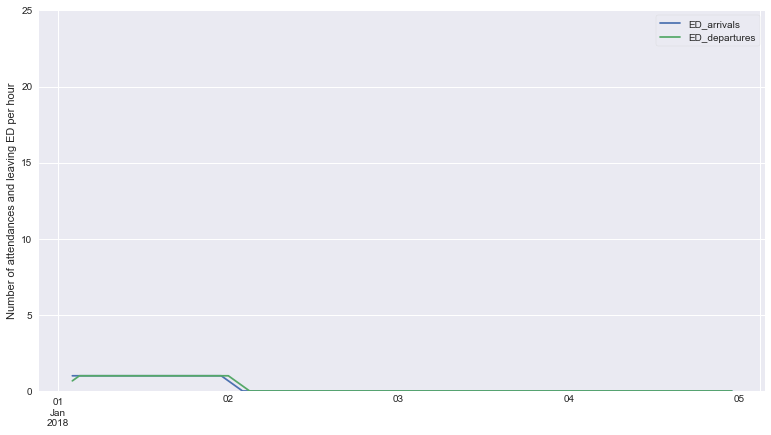

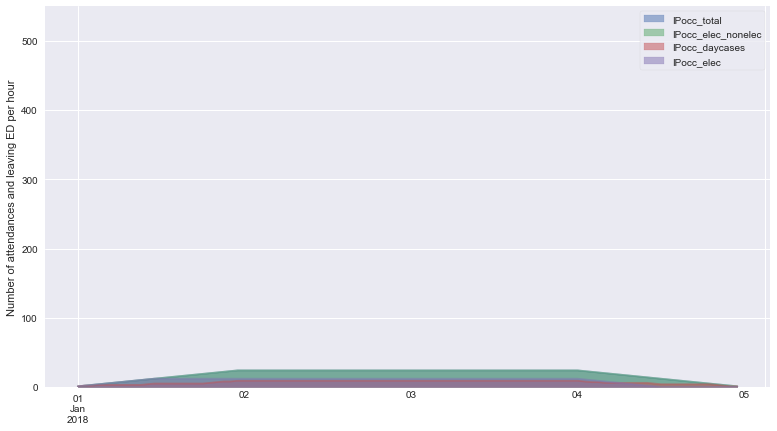

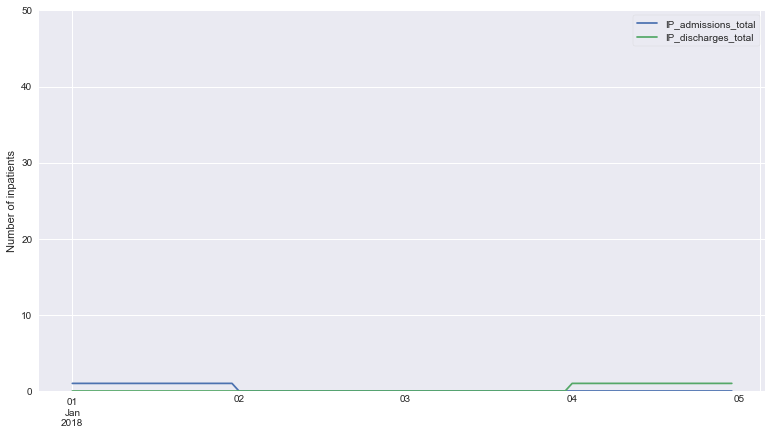

In [35]:
occupancy_plotting(hourly)

In [14]:
sd.metadata.PLOT_LIST.query('plot_type == "weekly"')#['plot_name'] = 10 #.values[0]

,plot_number,plot_name,plot_type,data_required
22,23,ED occupancy,weekly,[ED]
23,24,Inpatient occupancy,weekly,[IP]


In [13]:
sd.metadata.PLOT_LIST.query('plot_type == "hist"')#['plot_name'].values[0]

,plot_number,plot_name,plot_type,data_required
0,1,ED attendance and admission numbers by year,hist,[ED]
1,2,ED attendance and admission numbers by year an...,hist,[ED]
4,5,Waiting time for admitted/non-admitted patient...,hist,[ED]
10,11,Types of admission by year,hist,[IP]
11,12,Admission by age group by year,hist,[IP]
12,13,Patient volume by type (table),hist,[IP]
13,14,Emergency patient admission route numbers,hist,[IP]
18,19,Average ED occupancy by month,hist,[ED]
19,20,Average inpatient occupancy by month,hist,[IP]


In [14]:
sd.metadata.PLOT_LIST.loc[9].plot_name

'ED arrival and departure by hour of day (admitted)'

In [15]:
import matplotlib.pyplot as plt

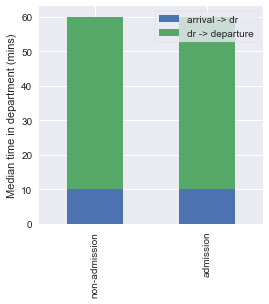

In [16]:
pat2 = sd.data.ED
wait_col = ['arr_dr_wait','dr_dep_wait']


wait_col2 = ['arr_dr_wait','dr_adm_req_wait','adm_req_dep_wait','dr_dep_wait']

fig, ax = plt.subplots()
pat2.groupby('ADMISSION_FLAG')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax,figsize=(4,4))
ax.set_xticklabels(['non-admission','admission']);
ax.set_ylabel('Median time in department (mins)');
ax.set_xlabel('');
ax.legend(['arrival -> dr','dr -> departure'],frameon=True);


In [17]:
sd.data.ED.columns

Index(['ADMISSION_FLAG', 'ADM_REQUEST_DTTM', 'ADM_REQUEST_LOC_DESCRIPTION',
       'AGE_AT_ARRIVAL', 'ARRIVAL_DTTM', 'ARRIVAL_MODE_NATIONAL_CODE',
       'DEPARTURE_DTTM', 'FIRSTDOC_FOR_TREATMENT_DTTM',
       'GENDER_NATIONAL_DESCRIPTION', 'PSEUDONYMISED_PATIENT_ID', 'SITE',
       'STREAM_LOCAL_CODE', 'TRIAGE_ASSESSMENT_DTTM', 'ARRIVAL_hour',
       'ARRIVAL_dayofweek', 'ARRIVAL_day', 'ARRIVAL_month', 'ARRIVAL_week',
       'ARRIVAL_dayofweek_name', 'ARRIVAL_year', 'ARRIVAL_date',
       'ARRIVAL_flag_wkend', 'DEPARTURE_hour', 'DEPARTURE_dayofweek',
       'DEPARTURE_day', 'DEPARTURE_month', 'DEPARTURE_week',
       'DEPARTURE_dayofweek_name', 'DEPARTURE_year', 'DEPARTURE_date',
       'DEPARTURE_flag_wkend', 'age_group', 'waiting_time', 'arr_triage_wait',
       'arr_dr_wait', 'arr_adm_req_wait', 'adm_req_dep_wait',
       'dr_adm_req_wait', 'dr_dep_wait', 'breach_flag', 'breach_datetime',
       'event_column_name_rounded'],
      dtype='object')

In [19]:
sd.data.plots.fig1

AttributeError: 'Plots' object has no attribute 'fig10'

In [ ]:
sd.data.plots.fig1

In [ ]:
sd.data.plots.table1

In [ ]:
plots_dict = {
    'plot_number':[
        1,
        2,
        3,
    ],
    'plot_title':[
        ''
    ]
}

In [ ]:
sd.data.plots

pat = sd.data.ED

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sd.data.ED.columns

## period analysis

dt_start = pd.datetime(2017,1,1)
dt_end = pd.datetime(2018,2,1)
mask = (pat['ARRIVAL_DTTM'] > dt_start) & (pat['DEPARTURE_DTTM'] < dt_end)
# pat.query('ARRIVAL_DTTM > dt_start')
# pat[mask]

#### ED hourly arrival discharge curves
# filter for period selected

# make table for plot

arr = pat[['ARRIVAL_hour','PSEUDONYMISED_PATIENT_ID']].groupby(['ARRIVAL_hour']).count()#.plot(ax=ax)
dep = pat[['DEPARTURE_hour','PSEUDONYMISED_PATIENT_ID']].groupby(['DEPARTURE_hour']).count()#.plot(ax=ax)

arr.rename(columns={'PSEUDONYMISED_PATIENT_ID':'Arrivals'},inplace=True)
dep.rename(columns={'PSEUDONYMISED_PATIENT_ID':'Departures'},inplace=True)
table = arr.merge(dep, left_index=True, right_index=True)

# plot
fig, ax = plt.subplots()
plt.suptitle('ED average hourly arrivals & departures')
table.plot(ax=ax)
ax.set_xticks(np.arange(0,25,2));

In [ ]:
fig

In [ ]:
sd.data.DAILY.plot(style='o')

In [ ]:
sd.data.HOURLY.plot()

In [ ]:
sd.data.HOURLY.sum()

In [ ]:
sd.data.IPSPELL.shape

In [ ]:
sd.data.DAILY

In [ ]:
sd.data.IP.columns

In [ ]:
ward = sd.data.IP

In [ ]:
ward.query('PSEUDONYMISED_PATIENT_ID == "100"')

In [ ]:
ward.shape

In [ ]:
ward.query('LOCATION_NUMBER == "1"').shape

In [ ]:
ward.shape

In [ ]:
ward.drop(['LOCATION_END','LOCATION_START'],axis=1).shape

In [ ]:
ward.LOCATION_NUMBER

In [ ]:
MOVE_list = [column for column in ward.columns if 'LOCATION' in column]
MOVE_list

In [ ]:
ward[MOVE_list]

In [ ]:
ward.columns

In [ ]:
ward.head()

In [ ]:
df = sd.data.HOURLY

df.between_time('0:00', '12:01')

#['ED_arrivals'].resample('D').sum()

In [ ]:
sd.data.HOURLY

In [ ]:
df.ADM_METHOD == '1'

In [ ]:
# inputs = ["1"]
df.query('ADM_METHOD in ["1"]')

In [ ]:
# inputs = ["1"]
df.query("ADM_METHOD in ['1']")

In [ ]:
test = sd.data.HOURLY

In [ ]:
sd.data.DAILY

In [ ]:
sd.data.IP.head()

In [ ]:
sd.data.ED.head()

In [ ]:
test

In [ ]:
test.shape

In [ ]:
daily_columns_list = []
for column in ['ED_arrivals','ED_departures']:
    daily_series = test[column].resample('D').sum()
    daily_columns_list.append(daily_series)
    
daily_columns_list[0]

In [ ]:
daily_columns_list = []
for column in ['ED_arrivals','ED_departures']:
    daily_series = test[column].resample('D').sum()
    daily_columns_list.append(daily_series)
    
pd.DataFrame(daily_columns_list[0])

In [ ]:
test.resample('D').sum()

In [ ]:
test.drop(index=test.index[[2,3,4,5]],inplace=True)

In [ ]:
test

In [ ]:
test.iloc[5:10].drop()

In [ ]:
sd.data.HOURLY2.head()

In [ ]:
sd.data.ED.head()

In [ ]:
sd.data.ED.DEPARTURE_DTTM

In [ ]:
sd.data.ED.columns

In [ ]:
import itertools
def count_hourly_occupancy2(df,datetime_col_start,datetime_column_end, new_column_name):
    """
    Function takes patient record level dataframe and calculates the occupancy/activity for each hour of the day.
    The activity is defined based on the two datetime columns being provided.
    e.g. if 'attendnace datetime' and 'departure datetime' were given then the 'activity' would be the occupancy of the department.

    Inputs
    ======
    df, pandas dataframe, with patient-record level activity.
    datetime_col_start, str, name of column in df when the activity begins. Column must be in datetime format.
    datetime_col_end, str, name of column in df when the activity ends. Column must be in datetime format.
    new_col_name, str, name to assign the new column that is produced.

    Output
    ======
    df, pandas dataframe, datetime index at hourly level, single column containing the count of activity in that hour
    (index potentially not continuous).
    """
    #### setup data to be easier to compute, 
#         df['event_column_name_rounded'] = df[event_column_name].apply(lambda x : x.replace(second=0, minute=0)) # round to lower hour
    df1 = df[[datetime_col_start,datetime_column_end]].copy()
    df1[datetime_col_start] = df1[datetime_col_start].apply(lambda x : x.replace(second=0,minute=0)) # round arrival hour down
    df1[datetime_column_end] = df1[datetime_column_end].apply(lambda x : x.replace(second=0,minute=0)) +pd.Timedelta(hours=1)
    
    
    #### create col with number of hours active 
    df1['n_hours'] = ((df1[datetime_column_end] - df1[datetime_col_start])/pd.Timedelta(1,'h')).astype(int)
    df1 = df1.drop(df1[df1['n_hours'] <=0].index) # must drop the negative n_hour rows as otherwise messes up my size of array initilisation (was getting an error that the index i was assinging to in ids was out of bounds).

    #### time efficient (i hope) function for cycling through and finding all combinations of active hours for attednaces 
    # - create a (long format) list of links between attendance numbers and 
    # function for list comp which finds list of datetimes (for each hour)
    date_func = lambda datetime , offset : datetime + pd.Timedelta(offset,'h')

    # iterate over rows in df
    df1 = df1.reset_index() # reset so have the new index to itereate over

    ids = np.empty(shape=(df1['n_hours'].sum()),dtype='int64') # initilise array - change to np.empty() to speed up
    timestamps = np.empty(shape=(df1['n_hours'].sum()),dtype='datetime64[s]')
    row_count = 0 # initialise row counter for empty arrays
    
    # iterate through rows of df
    for row in df1.itertuples():
        atten_id = [row[1]] # get attendance id
        hour_list = [date_func(row[2],i) for i in np.arange(row[4])] # make a list datetimes for each hour that patient is active.

        # populate empty arrays with seperate list of ids and timestamps.  
        for i in itertools.product(atten_id,hour_list):
            ids[row_count] = i[0] # assign patient number to array
            timestamps[row_count] = i[1] # 
            row_count += 1 # add to row count for new id-> hour pair
    
    # put ids and timestamps into df
    data = {'atten_id':ids,'hours':timestamps}
    df_new = pd.DataFrame(data=data)
    
    # count isntances for each hour
    df_new = df_new.groupby(['hours']).count()
    
    # set hours column to index
#     df_new.set_index('hours', inplace=True)
    df_new.index.name = '' # remove 'hours' as index name
    
    return df_new

df_new = count_hourly_occupancy2(sd.data.ED,'ARRIVAL_DTTM','DEPARTURE_DTTM','new_col')


df_new.head()

In [ ]:
df_new.index.name = ''

In [ ]:
df_new.index

In [ ]:
date_func = lambda datetime , offset : datetime + pd.Timedelta(offset,'h')
ids = np.empty(shape=(df1['n_hours'].sum()),dtype='int64') # initilise array - change to np.empty() to speed up
timestamps = np.empty(shape=(df1['n_hours'].sum()),dtype='datetime64[s]')
row_count = 0

for row in df1.itertuples():
    atten_id = [row[1]] # get attendance ID
    hour_list = [date_func(row[2],i) for i in np.arange(row[4])] # make a list datetimes for each hour that patient is active.
#     print(atten_id)
#     print(hour_list)

    # create array of list for all combinations of timestamp
    for i in itertools.product(atten_id,hour_list):
        ids[row_count] = i[0] # assign patient numbers
        timestamps[row_count] = i[1]
        row_count += 1 # add to row count for new array
#         print(i)
    
# put into df
data = {'atten_id':ids,'hours':timestamps}
df_new = pd.DataFrame(data=data)#,index=ids)#,columns=['new_col'])

In [ ]:
df_new.groupby(['hours']).count()

In [ ]:
df_new.groupby(['new_col']).count()

In [ ]:
row[4],i

In [ ]:
ids

In [ ]:
row[1]

In [ ]:
row.ARRIVAL_DTTM

In [ ]:
hour_list

In [ ]:
row_count

In [ ]:
df_new

In [ ]:
count_hourly_occupancy(sd.data.ED,'ARRIVAL_DTTM','DEPARTURE_DTTM','new_col')

In [ ]:
for row in 

In [ ]:
def count_hourly_occupancy(df,arrival_col,departure_col,count_name):
    """
    inputs:
    df with attendance number as index,
    arrival, departure datetime col names (must be datetime format)
    ouptut:
    df, contains many-to-many link between the arrival_
    NOTE: re-write required: very slow.
    """
    import itertools
    df1 = df[[arrival_col,departure_col]].copy()
    df1[arrival_col] = df1[arrival_col].apply(lambda x : x.replace(second=0,minute=0)) # round arrival hour down
    df1[departure_col] = df1[departure_col].apply(lambda x : x.replace(second=0,minute=0)) +pd.Timedelta(hours=1) # round leaving tim up
    
    #### create col with number of hours active 
    df1['n_hours'] = ((df1[departure_col] - df1[arrival_col])/pd.Timedelta(1,'h')).astype(int)
    df1 = df1.drop(df1[df1['n_hours'] <=0].index) # must drop the negative n_hour rows as otherwise messes up my size of array initilisation (was getting an error that the index i was assinging to in ids was out of bounds).
    
    #### time efficient (i hope) function for cycling through and finding all combinations of active hours for attednaces - create a (long format) list of links between attendance numbers and 

    # function for list comp which finds list of datetimes (for each hour)
    date_func = lambda datetime , offset : datetime + pd.Timedelta(offset,'h')

    # iterate over rows in df
    df1 = df1.reset_index() # reset so have the new index to itereate over

    ids = np.empty(shape=(df1['n_hours'].sum()),dtype='int64') # initilise array - change to np.empty() to speed up
    timestamps = np.empty(shape=(df1['n_hours'].sum()),dtype='datetime64[s]')
    row_count = 0

    for row in df1.itertuples():
        atten_id = [row[1]]
        hour_list = [date_func(row[2],i) for i in np.arange(row[4])] # creates list of hour datetimes

        # create array of list for all combinations of timestamp
        for i in itertools.product(atten_id,hour_list):
            ids[row_count] = i[0] # assign patient numbers
            timestamps[row_count] = i[1]
            row_count += 1 # add to row count for new array    
    # put into df
    data = {'atten_id':ids}
    df_new = pd.DataFrame(data=data,index=timestamps,columns=[count_name])

    return(df_new)

In [ ]:
break

In [ ]:
%ls

In [ ]:
setup = imp.load_source('setup.py',)

In [ ]:
setup.RESULTS_SAVE_PATH

In [ ]:
path = "..//"
from path import flosp

In [ ]:
break

In [ ]:
def import_package_above(num_dirs, module_name):
    """ imports a package by moving to directory above, running import statement and returning to original directory"""
    import importlib
    import os
    
    path_original = os.getcwd()
    os.chdir("../../" * num_dirs) # move up to directory
    try:
        module = importlib.import_module(module_name)
        print('Loaded package ', module_name)
    except:
        print('Could not load package')
        
    os.chdir(path_original) # return to original directory
    return(module)

flosp = import_package_above(2,'flosp')

In [ ]:
class PeriodPlotting:
    """ Class produces all plots for a period of time defined by user. """
    def __init__(self, data, metadata, dt_start, dt_end, required_plot='all'):
        #### initialise all data
        self.data = data
        self.metadata = metadata
        self.dt_start = dt_start
        self.dt_end = dt_end
        print('initialised')
        
        #### call all plot methods
        if required_plot == 'all':
            for plot_no in ['1']:
                print('in for loop')
                getattr(self, 'plot' + plot_no)
                self.plot1()
        else:
            print('in else statement ')
            exec('self.' + required_plot)
            exec('self.plot2()')
        return
    
    def plot1(self):
        print('plot 1 print')
        self.plot1output = 5
        return
    
    def plot2(self):
        print('plot 2 print')
        self.plot2output = 10
        return
    
    
classname = PeriodPlotting(1,2,3,4,'plot2')

#classname2 = PeriodPlotting(1,2,3,4,'plot2')


In [ ]:
classname.plot1output

In [ ]:
PeriodPlotting(1,2,3,4,'all')

In [ ]:
PeriodPlotting(1,2,3,4,'all')

# testing

In [ ]:
cols = ['y','n','m']
pd.DataFrame([[1,2,3],[4,5,6]],columns = cols)